In [2]:
import numpy as np
import pandas as pd

data = pd.read_csv('/content/data_3_1_2.csv').to_numpy()

x = data[:, :-1]
y = data[:, -1]

print('x', x.shape)
print('y', y.shape)

x (200, 2)
y (200,)


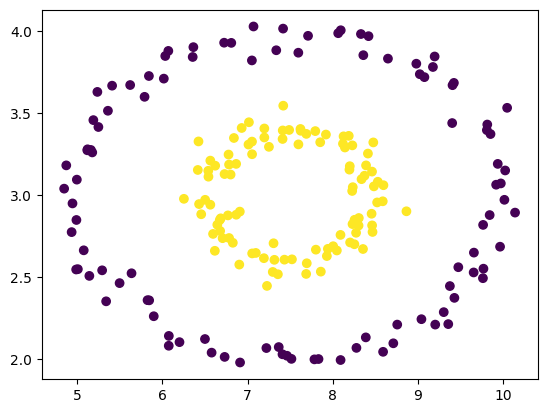

In [3]:
import matplotlib.pyplot as plt

plt.scatter(x[:, 0], x[:, 1], c=y)
plt.show()

## Create a model

In [12]:
import torch
import torch.nn as nn

class MyModel(nn.Module):
  def __init__(self, numb_input):
    super().__init__()
    self.linear = nn.Linear(numb_input, 1)

  def forward(self, x):
    '''
    x : tensor(m, 2)
    y : tensor(m)
    '''
    out = self.linear(x) # tensor(m, 1)
    out = torch.sigmoid(out) # tensor(m, 1)
    return out.flatten() # tensor(m)

  def fit(self, x, y, numb_iter=500, lr=0.01):
    opt = optim.SGD(self.parameters(), lr=lr)
    for i in range(numb_iter):
      zip = self(x)
      J = -y*torch.log(zip) - (1 - y)*torch.log(1-zip)
      J = J.mean()

      if i % 20 == 0:
        print('iter: %d, J: %f' % (i, J.item()))

      J.backward()
      opt.step() # update gradient
      opt.zero_grad()  # reset gradient

  def evaluate(self, x, y):
    zip = self(x)
    zip = (zip > 0.5).float()
    return (zip == y).float().mean()


tmp = torch.randn(100, 4)
model = MyModel(4)
output = model(tmp)

print('output', output.shape)

output torch.Size([100])


In [17]:
#feature scaling
def feature_scaling(x):
  mu = np.mean(x, axis=0) #np(n)
  x = (x-mu)/(np.max(x, axis=0)-np.min(x, axis=0))
  return x

## Training Model V2

In [25]:
import torch.optim as optim

model = MyModel(2)

tx = torch.tensor(x, dtype=torch.float32)
ty = torch.tensor(y, dtype=torch.float32)

model.fit(tx, ty, numb_iter=2000)

iter: 0, J: 3.068594
iter: 20, J: 0.756259
iter: 40, J: 0.694121
iter: 60, J: 0.694026
iter: 80, J: 0.693976
iter: 100, J: 0.693928
iter: 120, J: 0.693882
iter: 140, J: 0.693838
iter: 160, J: 0.693797
iter: 180, J: 0.693758
iter: 200, J: 0.693720
iter: 220, J: 0.693685
iter: 240, J: 0.693651
iter: 260, J: 0.693619
iter: 280, J: 0.693589
iter: 300, J: 0.693560
iter: 320, J: 0.693532
iter: 340, J: 0.693506
iter: 360, J: 0.693481
iter: 380, J: 0.693457
iter: 400, J: 0.693435
iter: 420, J: 0.693414
iter: 440, J: 0.693393
iter: 460, J: 0.693374
iter: 480, J: 0.693356
iter: 500, J: 0.693338
iter: 520, J: 0.693322
iter: 540, J: 0.693306
iter: 560, J: 0.693291
iter: 580, J: 0.693277
iter: 600, J: 0.693263
iter: 620, J: 0.693250
iter: 640, J: 0.693238
iter: 660, J: 0.693226
iter: 680, J: 0.693215
iter: 700, J: 0.693205
iter: 720, J: 0.693195
iter: 740, J: 0.693185
iter: 760, J: 0.693176
iter: 780, J: 0.693168
iter: 800, J: 0.693159
iter: 820, J: 0.693152
iter: 840, J: 0.693144
iter: 860, J: 0.6

## Evaluating the model V2

In [26]:
accuracy = model.evaluate(tx, ty)
print('Accuracy rate: %.4f' % accuracy.item())

Accuracy rate: 0.5150


## Train Model V4

In [23]:
x = data[:, :-1]
y = data[:, -1]

model2 = MyModel(4)

x1 = x[:, 0]
x2 = x[:, 1]
x3 = np.square(x1)
x4 = np.square(x2)

new_x = np.concatenate((x, x3.reshape(-1, 1), x4.reshape(-1, 1)), axis=1) # np(m, 4)
new_x = feature_scaling(new_x)

tx_new = torch.tensor(new_x, dtype=torch.float32)

model2.fit(tx_new, ty, numb_iter=2000, lr=1)


iter: 0, J: 0.712430
iter: 20, J: 0.693523
iter: 40, J: 0.691775
iter: 60, J: 0.690295
iter: 80, J: 0.688886
iter: 100, J: 0.687498
iter: 120, J: 0.686118
iter: 140, J: 0.684743
iter: 160, J: 0.683372
iter: 180, J: 0.682005
iter: 200, J: 0.680643
iter: 220, J: 0.679284
iter: 240, J: 0.677929
iter: 260, J: 0.676578
iter: 280, J: 0.675232
iter: 300, J: 0.673889
iter: 320, J: 0.672549
iter: 340, J: 0.671214
iter: 360, J: 0.669883
iter: 380, J: 0.668555
iter: 400, J: 0.667232
iter: 420, J: 0.665912
iter: 440, J: 0.664596
iter: 460, J: 0.663284
iter: 480, J: 0.661976
iter: 500, J: 0.660671
iter: 520, J: 0.659370
iter: 540, J: 0.658073
iter: 560, J: 0.656780
iter: 580, J: 0.655491
iter: 600, J: 0.654205
iter: 620, J: 0.652923
iter: 640, J: 0.651644
iter: 660, J: 0.650370
iter: 680, J: 0.649099
iter: 700, J: 0.647832
iter: 720, J: 0.646568
iter: 740, J: 0.645308
iter: 760, J: 0.644052
iter: 780, J: 0.642799
iter: 800, J: 0.641550
iter: 820, J: 0.640305
iter: 840, J: 0.639063
iter: 860, J: 0.6

## Evaluating Model V4

In [24]:
accuracy = model2.evaluate(tx_new, ty)
print('Accuracy rate: %.4f' % accuracy.item())

Accuracy rate: 1.0000
